In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style

In [2]:
df=pd.read_excel("C:/Users/z0126520/Documents/Python/GL/Week 20_Project/compactiv (1).xlsx")

## The comp-activ databases is a collection of a computer systems activity measures .The data was collected from a Sun Sparcstation 20/712 with 128 Mbytes of memory running in a multi-user university department. Users would typically be doing a large variety of tasks ranging from accessing the internet, editing files or running very cpu-bound programs. 

As you are a budding data scientist you thought to find out a linear equation to build a model to predict 'usr'(Portion of time (%) that cpus run in user mode) and to find out how each attribute affects the system to be in 'usr' mode using a list of system attributes.
lread - Reads (transfers per second ) between system memory and user memory
lwrite - writes (transfers per second) between system memory and user memory
scall - Number of system calls of all types per second
sread - Number of system read calls per second .
swrite - Number of system write calls per second .
fork - Number of system fork calls per second.
exec - Number of system exec calls per second.
rchar - Number of characters transferred per second by system read calls
wchar - Number of characters transfreed per second by system write calls
pgout - Number of page out requests per second
ppgout - Number of pages, paged out per second
pgfree - Number of pages per second placed on the free list.
pgscan - Number of pages checked if they can be freed per second
atch - Number of page attaches (satisfying a page fault by reclaiming a page in memory) per second
pgin - Number of page-in requests per second
ppgin - Number of pages paged in per second
pflt - Number of page faults caused by protection errors (copy-on-writes).
vflt - Number of page faults caused by address translation .
runqsz - Process run queue size (The number of kernel threads in memory that are waiting for a CPU to run.
Typically, this value should be less than 2. Consistently higher values mean that the system might be CPU-bound.)
freemem - Number of memory pages available to user processes
freeswap - Number of disk blocks available for page swapping.
usr - Portion of time (%) that cpus run in user mode.

## 1.1 Read the data and do exploratory data analysis. Describe the data briefly. (Check the Data types, shape, EDA, 5 point summary). Perform Univariate, Bivariate Analysis, Multivariate Analysis.

In [3]:
df.head()

lread  lwrite  scall  sread  swrite  fork  exec    rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2  40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2    448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4      NaN  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2      NaN   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4      NaN  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt         runqsz  freemem  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40      CPU_Bound     4670   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83  Not_CPU_Bound     7278   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20  Not_CPU_Bound      702   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80  Not_CPU_Bound     7248   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60  Not_CPU_Bound      633   

  freeswap  usr  
0  1730946   95  
1  1869002   97  
2  1021237   87  
3  1863704   98  
4  1760253   90  

[5 rows x 22 columns]

In [4]:
df.tail()

lread  lwrite  scall  sread  swrite  fork  exec     rchar    wchar  \
8187     16      12   3009    360     244   1.6  5.81  405250.0  85282.0   
8188      4       0   1596    170     146   2.4  1.80   89489.0  41764.0   
8189     16       5   3116    289     190   0.6  0.60  325948.0  52640.0   
8190     32      45   5180    254     179   1.2  1.20   62571.0  29505.0   
8191      2       0    985     55      46   1.6  4.80  111111.0  22256.0   

      pgout  ...  pgscan  atch   pgin  ppgin    pflt    vflt         runqsz  \
8187   8.02  ...   55.11   0.6  35.87  47.90  139.28  270.74      CPU_Bound   
8188   3.80  ...    0.20   0.8   3.80   4.40  122.40  212.60  Not_CPU_Bound   
8189   0.40  ...    0.00   0.4  28.40  45.20   60.20  219.80  Not_CPU_Bound   
8190   1.40  ...   18.04   0.4  23.05  24.25   93.19  202.81      CPU_Bound   
8191   0.00  ...    0.00   0.2   3.40   6.20   91.80  110.00      CPU_Bound   

      freemem freeswap  usr  
8187      387   986647   80  
8188      263  1055742   90  
8189      400   969106   87  
8190      141  1022458   83  
8191      659  1756514   94  

[5 rows x 22 columns]

In [5]:
df.shape

(8192, 22)

In [6]:
df.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

In [7]:
df.describe().T

count          mean            std     min        25%        50%  \
lread     8192.0  1.955969e+01      53.353799     0.0        2.0        7.0   
lwrite    8192.0  1.310620e+01      29.891726     0.0        0.0        1.0   
scall     8192.0  2.306318e+03    1633.617322   109.0     1012.0     2051.5   
sread     8192.0  2.104800e+02     198.980146     6.0       86.0      166.0   
swrite    8192.0  1.500582e+02     160.478980     7.0       63.0      117.0   
fork      8192.0  1.884554e+00       2.479493     0.0        0.4        0.8   
exec      8192.0  2.791998e+00       5.212456     0.0        0.2        1.2   
rchar     8088.0  1.973857e+05  239837.493526   278.0    34091.5   125473.5   
wchar     8177.0  9.590299e+04  140841.707911  1498.0    22916.0    46619.0   
pgout     8192.0  2.285317e+00       5.307038     0.0        0.0        0.0   
ppgout    8192.0  5.977229e+00      15.214590     0.0        0.0        0.0   
pgfree    8192.0  1.191971e+01      32.363520     0.0        0.0        0.0   
pgscan    8192.0  2.152685e+01      71.141340     0.0        0.0        0.0   
atch      8192.0  1.127505e+00       5.708347     0.0        0.0        0.0   
pgin      8192.0  8.277960e+00      13.874978     0.0        0.6        2.8   
ppgin     8192.0  1.238859e+01      22.281318     0.0        0.6        3.8   
pflt      8192.0  1.097938e+02     114.419221     0.0       25.0       63.8   
vflt      8192.0  1.853158e+02     191.000603     0.2       45.4      120.4   
freemem   8192.0  1.763456e+03    2482.104511    55.0      231.0      579.0   
freeswap  8192.0  1.328126e+06  422019.426957     2.0  1042623.5  1289289.5   
usr       8192.0  8.396887e+01      18.401905     0.0       81.0       89.0   

                  75%         max  
lread          20.000     1845.00  
lwrite         10.000      575.00  
scall        3317.250    12493.00  
sread         279.000     5318.00  
swrite        185.000     5456.00  
fork            2.200       20.12  
exec            2.800       59.56  
rchar      267828.750  2526649.00  
wchar      106101.000  1801623.00  
pgout           2.400       81.44  
ppgout          4.200      184.20  
pgfree          5.000      523.00  
pgscan          0.000     1237.00  
atch            0.600      211.58  
pgin            9.765      141.20  
ppgin          13.800      292.61  
pflt          159.600      899.80  
vflt          251.800     1365.00  
freemem      2002.250    12027.00  
freeswap  1730379.500  2243187.00  
usr            94.000       99.00

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
lread       8192 non-null int64
lwrite      8192 non-null int64
scall       8192 non-null int64
sread       8192 non-null int64
swrite      8192 non-null int64
fork        8192 non-null float64
exec        8192 non-null float64
rchar       8088 non-null float64
wchar       8177 non-null float64
pgout       8192 non-null float64
ppgout      8192 non-null float64
pgfree      8192 non-null float64
pgscan      8192 non-null float64
atch        8192 non-null float64
pgin        8192 non-null float64
ppgin       8192 non-null float64
pflt        8192 non-null float64
vflt        8192 non-null float64
runqsz      8192 non-null object
freemem     8192 non-null int64
freeswap    8192 non-null int64
usr         8192 non-null int64
dtypes: float64(13), int64(8), object(1)
memory usage: 1.4+ MB


## 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of creating new features if required. Also check for outliers and duplicates if there.

In [9]:
#imputing null values
for column in df.columns:
    if df[column].dtype != 'object':
        mean = df[column].mean()
        df[column] = df[column].fillna(mean)       
df.isnull().sum()

lread       0
lwrite      0
scall       0
sread       0
swrite      0
fork        0
exec        0
rchar       0
wchar       0
pgout       0
ppgout      0
pgfree      0
pgscan      0
atch        0
pgin        0
ppgin       0
pflt        0
vflt        0
runqsz      0
freemem     0
freeswap    0
usr         0
dtype: int64

In [10]:
# checking the object variables info
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

RUNQSZ :  2
CPU_Bound        3861
Not_CPU_Bound    4331
Name: runqsz, dtype: int64




In [11]:
df= pd.get_dummies(df, columns=['runqsz'],drop_first=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
lread                   8192 non-null int64
lwrite                  8192 non-null int64
scall                   8192 non-null int64
sread                   8192 non-null int64
swrite                  8192 non-null int64
fork                    8192 non-null float64
exec                    8192 non-null float64
rchar                   8192 non-null float64
wchar                   8192 non-null float64
pgout                   8192 non-null float64
ppgout                  8192 non-null float64
pgfree                  8192 non-null float64
pgscan                  8192 non-null float64
atch                    8192 non-null float64
pgin                    8192 non-null float64
ppgin                   8192 non-null float64
pflt                    8192 non-null float64
vflt                    8192 non-null float64
freemem                 8192 non-null int64
freeswap                8192 no

In [13]:
def univariateAnalysis_numeric(column,nbins):
    plt.figure(figsize=(10,10))
    plt.subplot(2,2,1)
    if df[column].dtype != 'object':
        sns.distplot(df[column], kde=True, color='g')
    plt.subplot(2,2,2)
    if df[column].dtype != 'object':
        ax = sns.boxplot(x=df[column])
    plt.show()

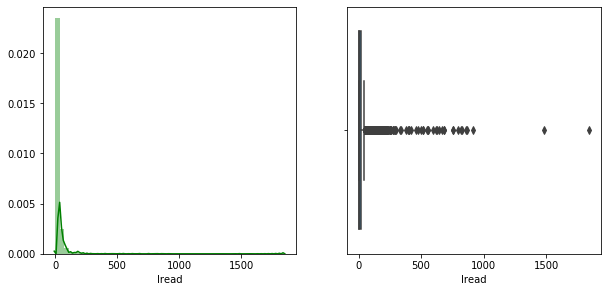

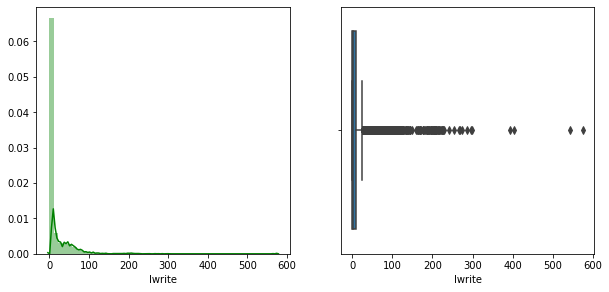

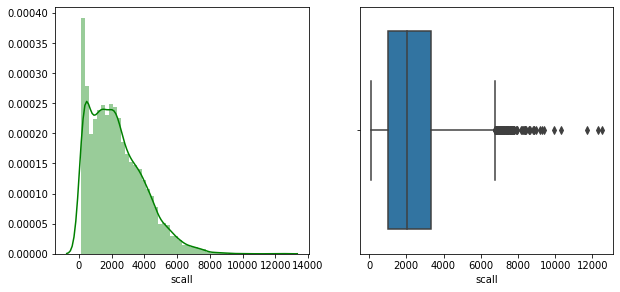

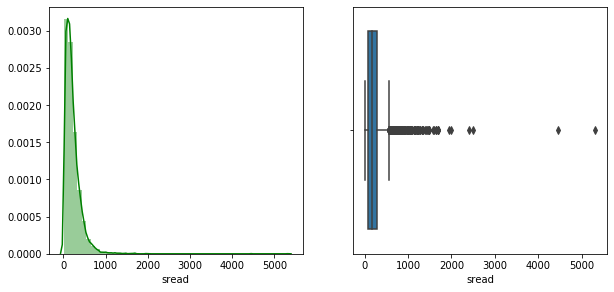

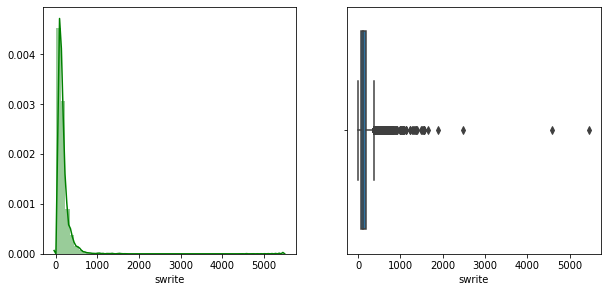

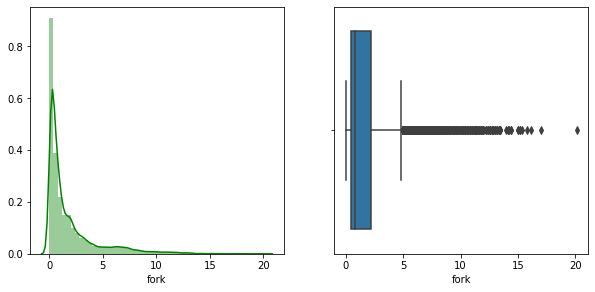

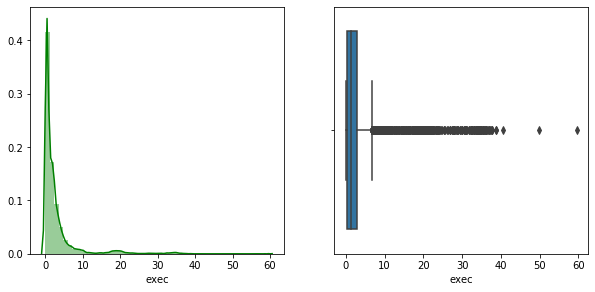

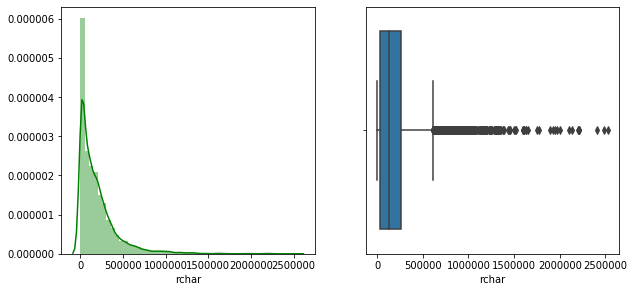

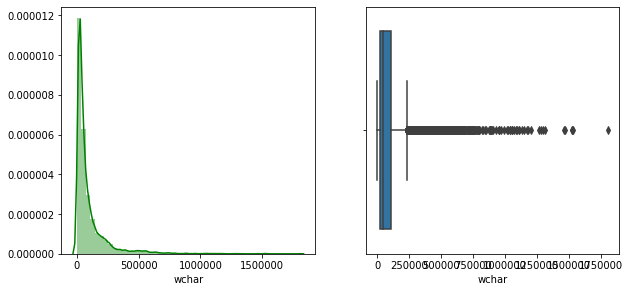

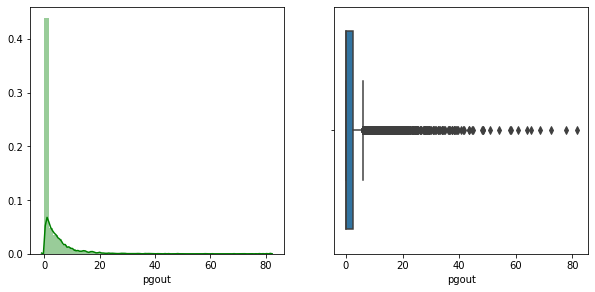

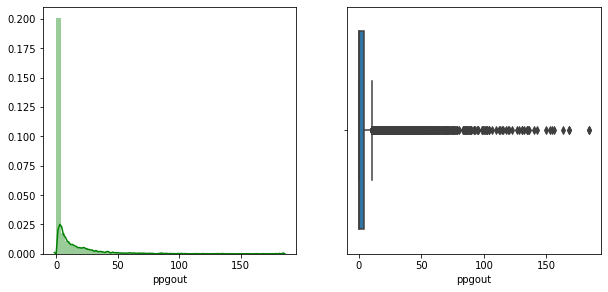

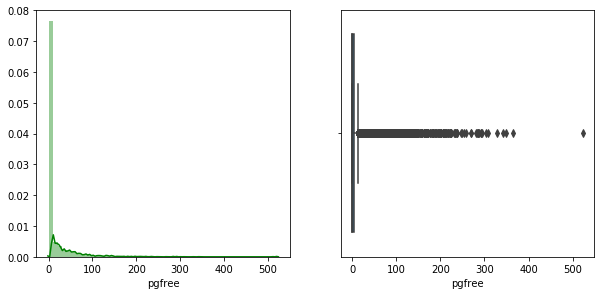

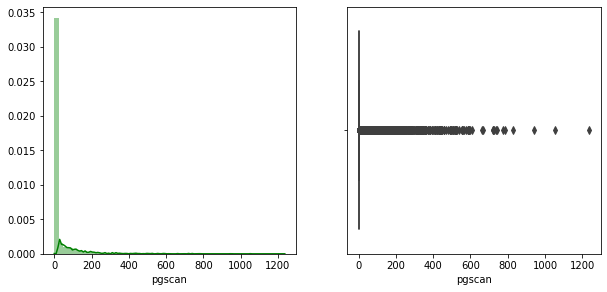

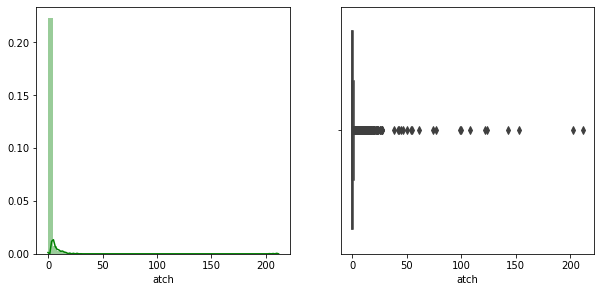

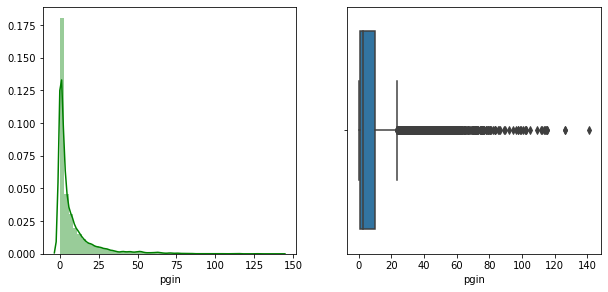

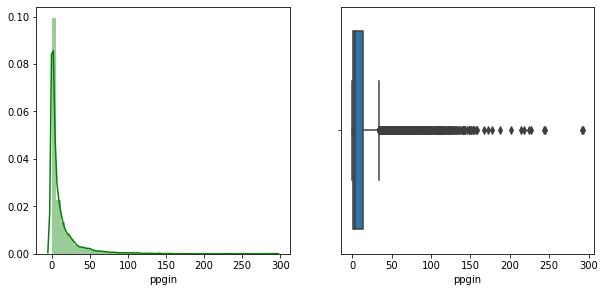

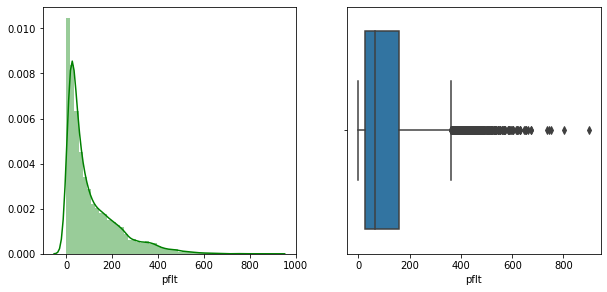

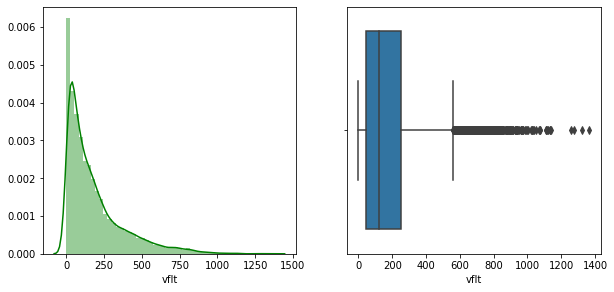

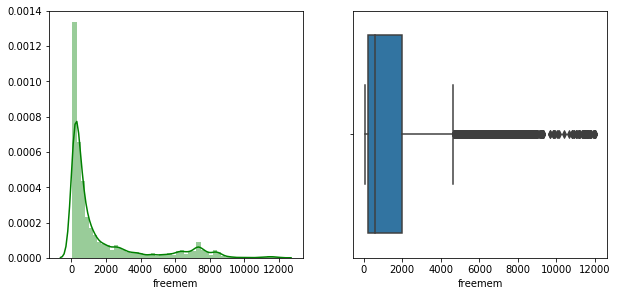

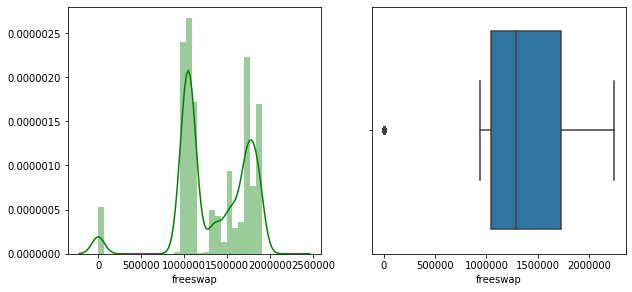

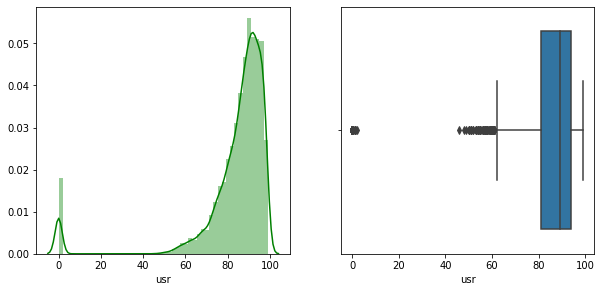

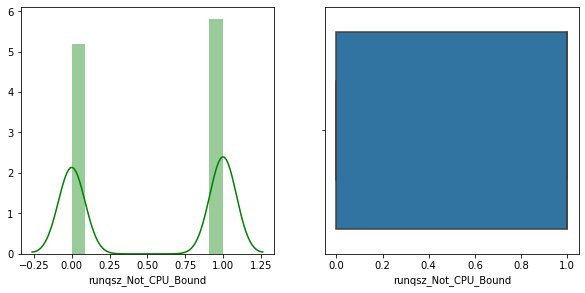

In [14]:
for i in df.columns:
        univariateAnalysis_numeric(i,5)

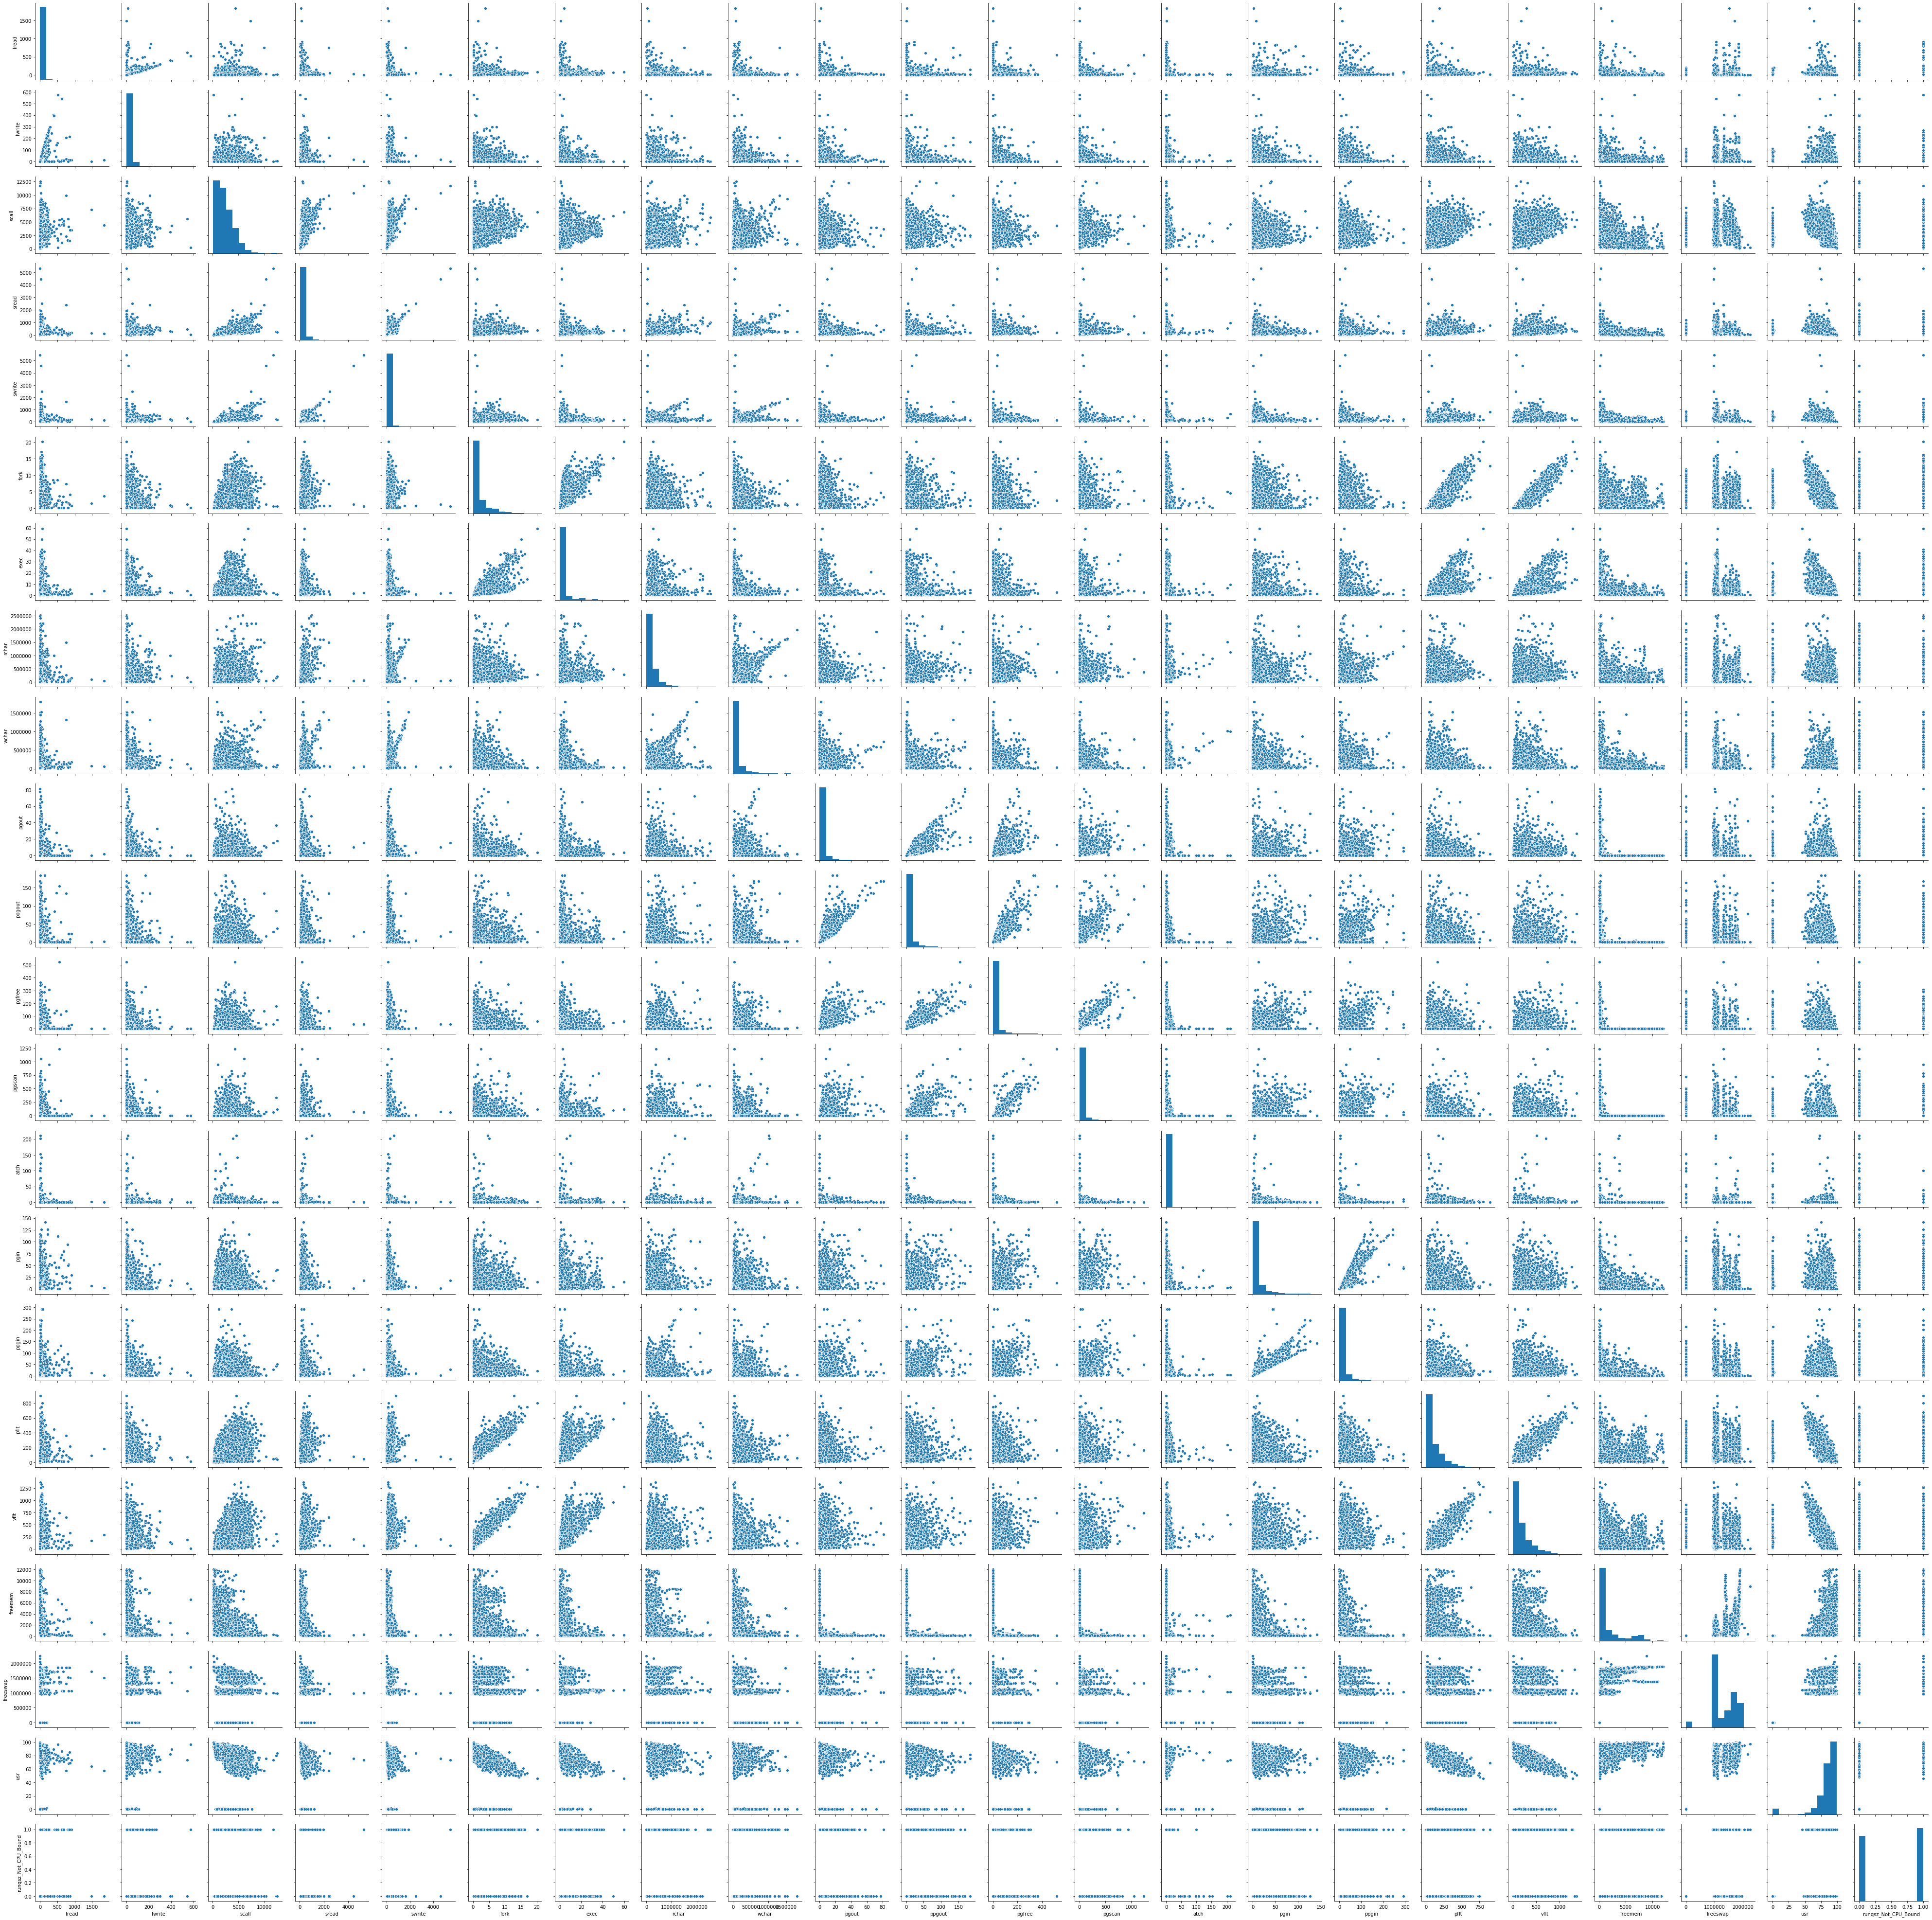

In [15]:
sns.pairplot(df)

In [16]:
corr=df.corr()

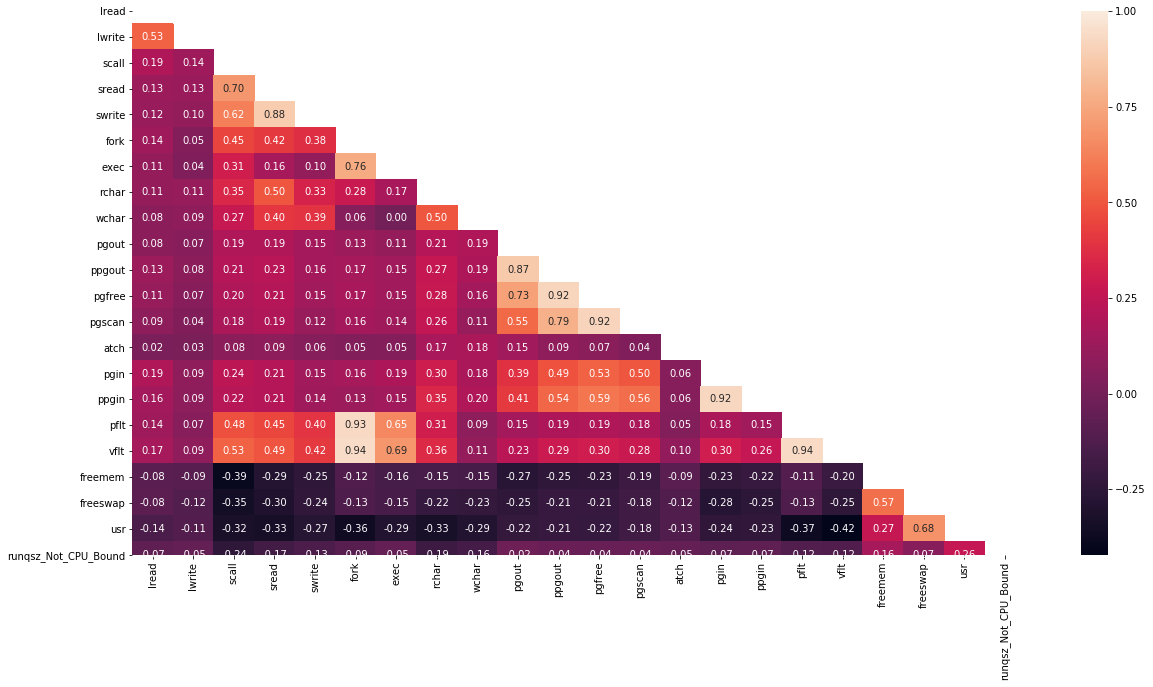

In [17]:
plt.figure(figsize = (20,10))
matrix = np.triu(corr)
sns.heatmap(df.corr(),annot=True,fmt='.2f', mask=matrix)

In [18]:
df.duplicated().sum()

0

In [19]:
for x in df.columns:
    y=(df[x]== 0.00).sum()
    print(x,':',y)

lread : 675
lwrite : 2684
scall : 0
sread : 0
swrite : 0
fork : 21
exec : 21
rchar : 0
wchar : 0
pgout : 4878
ppgout : 4878
pgfree : 4869
pgscan : 6448
atch : 4575
pgin : 1220
ppgin : 1220
pflt : 3
vflt : 0
freemem : 0
freeswap : 0
usr : 283
runqsz_Not_CPU_Bound : 3861


In [20]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [21]:
for column in df.columns:
    if column!= 'usr':
        lr,ur=remove_outlier(df[column])
        df[column]=np.where(df[column]>ur,ur,df[column])
        df[column]=np.where(df[column]<lr,lr,df[column])

In [22]:
# Copy all the predictor variables into X dataframe
X = df.drop('usr', axis=1)

# Copy target into the y dataframe. 
y = df[['usr']]

SKlearn

## 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

In [23]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

In [24]:
# invoke the LinearRegression function and find the bestfit model on training data
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for lread is -0.07667325249943116
The coefficient for lwrite is 0.03904850905449439
The coefficient for scall is 0.001062503029516082
The coefficient for sread is 0.001581015476343084
The coefficient for swrite is -0.005586694336749941
The coefficient for fork is -0.8859128957992463
The coefficient for exec is -0.016659957008201887
The coefficient for rchar is -1.0307227116382323e-05
The coefficient for wchar is -5.973533135464858e-06
The coefficient for pgout is -0.8340754305278943
The coefficient for ppgout is 0.07857260123705427
The coefficient for pgfree is 0.06314415837936149
The coefficient for pgscan is -1.3322676295501878e-15
The coefficient for atch is 1.280115036423647
The coefficient for pgin is 0.28481448619869404
The coefficient for ppgin is -0.16616132799517033
The coefficient for pflt is -0.05650981619638297
The coefficient for vflt is 0.01612323853168613
The coefficient for freemem is -0.0024003417177068443
The coefficient for freeswap is 3.2947656084948

In [26]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 45.363682618481675


In [27]:
# R square on training data
r2=regression_model.score(X_train, y_train)
r2

0.6201803014374797

In [28]:
# R square on test data
r_2=regression_model.score(X_test, y_test)
r_2

0.6096995272247381

In [29]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

11.197722688713112

In [30]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

11.916888626241105

In [31]:
#adj r square for train
adj_r2=1 - ((1-r2) * (len(X_train)-1)/(len(X_train)-(X_train.shape[1])-1))
adj_r2
adj_r_2=1 - ((1-r_2) * (len(X_test)-1)/(len(X_test)-(X_test.shape[1])-1))
adj_r_2

0.6056539645750438

Linear regression with Stats Model

In [32]:
import statsmodels.api as sm

In [33]:
X_train=sm.add_constant(X_train)# This adds the constant term beta0 to the Simple Linear Regression.
X_test=sm.add_constant(X_test)

c:\app\Python37\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [34]:
model = sm.OLS(y_train,X_train).fit()
model

In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     499.9
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:11:51   Log-Likelihood:                -23560.
No. Observations:                6144   AIC:                         4.716e+04
Df Residuals:                    6123   BIC:                         4.730e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   45.3637      0.770     58.944      0.000      43.855      46.872
lread                   -0.0767      0.022     -3.500      0.000      -0.120      -0.034
lwrite                   0.0390      0.032      1.218      0.223      -0.024       0.102
scall                    0.0011      0.000      6.909      0.000       0.001       0.001
sread                    0.0016      0.002      0.642      0.521      -0.003       0.006
swrite                  -0.0056      0.003     -1.598      0.110      -0.012       0.001
fork                    -0.8859      0.322     -2.751      0.006      -1.517      -0.255
exec                    -0.0167      0.126     -0.132      0.895      -0.263       0.230
rchar                -1.031e-05   1.19e-06     -8.652      0.000   -1.26e-05   -7.97e-06
wchar                -5.974e-06   2.54e-06     -2.354      0.019   -1.09e-05   -9.99e-07
pgout                   -0.8341      0.219     -3.806      0.000      -1.264      -0.404
ppgout                   0.0786      0.193      0.408      0.683      -0.299       0.456
pgfree                   0.0631      0.117      0.539      0.590      -0.167       0.293
pgscan                1.078e-14   3.17e-16     34.033      0.000    1.02e-14    1.14e-14
atch                     1.2801      0.350      3.661      0.000       0.595       1.966
pgin                     0.2848      0.069      4.104      0.000       0.149       0.421
ppgin                   -0.1662      0.048     -3.455      0.001      -0.260      -0.072
pflt                    -0.0565      0.005    -11.668      0.000      -0.066      -0.047
vflt                     0.0161      0.003      4.681      0.000       0.009       0.023
freemem                 -0.0024      0.000    -19.283      0.000      -0.003      -0.002
freeswap              3.295e-05   4.64e-07     71.052      0.000     3.2e-05    3.39e-05
runqsz_Not_CPU_Bound     7.0212      0.308     22.781      0.000       6.417       7.625
==============================================================================
Omnibus:                     1484.728   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4229.119
Skew:                          -1.264   Prob(JB):                         0.00
Kurtosis:                       6.182   Cond. No.                     1.73e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.07e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [36]:
# let us recreate the dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = model.fittedvalues.values  # predicted values
df_pred["Residuals"] = model.resid.values  # residuals

df_pred.head()

Actual Values  Fitted Values  Residuals
0             94      83.061186  10.938814
1             96      69.569820  26.430180
2             77      69.488441   7.511559
3             93     108.850009 -15.850009
4             86      89.317662  -3.317662

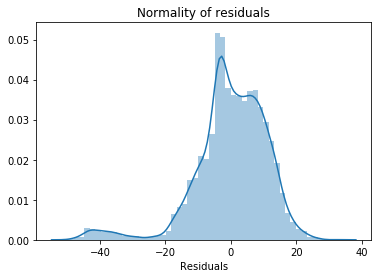

In [37]:
sns.distplot(df_pred["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()

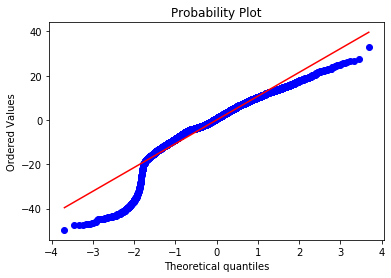

In [38]:
#QQ plot
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

As per the Residuals destribution, QQ plot and shapiro test... Residuals are normally distributed

In [39]:
#transformation model
df_tfm=pd.DataFrame()
for i in df.columns:
    a=np.cbrt(df[i])
    df_tfm[i]=a

In [40]:
# independent variables
X_tfm = df_tfm.drop(["usr"], axis=1)
# dependent variable
y_tfm = df_tfm[["usr"]]
X_train_tfm, X_test_tfm, y_train_tfm, y_test_tfm = train_test_split(
    X_tfm, y_tfm, test_size=0.30, random_state=1
)

In [41]:
import statsmodels.api as sm
X_train_tfm=sm.add_constant(X_train_tfm)
model_tfm = sm.OLS(y_train_tfm,X_train_tfm).fit()
model_tfm

In [42]:
model_tfm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1875.
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:11:51   Log-Likelihood:                -1135.4
No. Observations:                5734   AIC:                             2313.
Df Residuals:                    5713   BIC:                             2453.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.4672      0.037    -12.482      0.000      -0.541      -0.394
lread                    0.0112      0.009      1.255      0.210      -0.006       0.029
lwrite                  -0.0015      0.007     -0.206      0.837      -0.015       0.012
scall                    0.0216      0.002      9.101      0.000       0.017       0.026
sread                    0.0222      0.008      2.928      0.003       0.007       0.037
swrite                  -0.0051      0.009     -0.594      0.553      -0.022       0.012
fork                    -0.3555      0.041     -8.658      0.000      -0.436      -0.275
exec                     0.0773      0.019      4.024      0.000       0.040       0.115
rchar                   -0.0025      0.000     -7.998      0.000      -0.003      -0.002
wchar                   -0.0001      0.000     -0.247      0.805      -0.001       0.001
pgout                   -0.0072      0.036     -0.200      0.842      -0.077       0.063
ppgout                  -0.0893      0.045     -1.976      0.048      -0.178      -0.001
pgfree                   0.0288      0.030      0.964      0.335      -0.030       0.088
pgscan               -1.288e-16    2.4e-17     -5.368      0.000   -1.76e-16   -8.17e-17
atch                     0.0495      0.012      4.077      0.000       0.026       0.073
pgin                     0.2163      0.026      8.275      0.000       0.165       0.268
ppgin                   -0.1304      0.023     -5.727      0.000      -0.175      -0.086
pflt                    -0.1028      0.010    -10.055      0.000      -0.123      -0.083
vflt                     0.1031      0.009     11.992      0.000       0.086       0.120
freemem                 -0.0332      0.002    -20.686      0.000      -0.036      -0.030
freeswap                 0.0447      0.000    171.421      0.000       0.044       0.045
runqsz_Not_CPU_Bound     0.2233      0.008     26.329      0.000       0.207       0.240
==============================================================================
Omnibus:                        2.637   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.267   Jarque-Bera (JB):                2.531
Skew:                          -0.014   Prob(JB):                        0.282
Kurtosis:                       2.901   Cond. No.                     4.55e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.45e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [43]:
# let us recreate the dataframe with actual, fitted and residual values
df_pred_tfm = pd.DataFrame()

df_pred_tfm["Actual Values"] = y_train_tfm.values.flatten()  # actual values
df_pred_tfm["Fitted Values"] = model_tfm.fittedvalues.values  # predicted values
df_pred_tfm["Residuals"] = model_tfm.resid.values  # residuals

df_pred_tfm.head()

Actual Values  Fitted Values  Residuals
0       4.497941       4.424236   0.073705
1       4.546836       4.159320   0.387516
2       0.000000       0.575132  -0.575132
3       4.362071       3.905201   0.456870
4       4.546836       4.653367  -0.106531

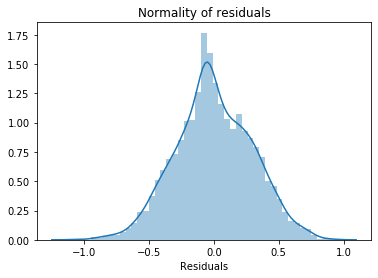

In [44]:
sns.distplot(df_pred_tfm["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()

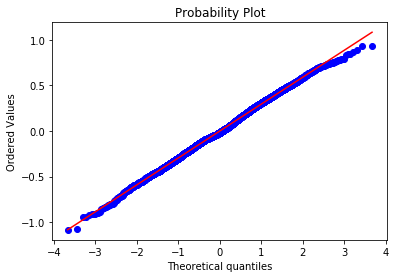

In [45]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred_tfm["Residuals"], dist="norm", plot=pylab)
plt.show()


From histogram and qq plot of residuals, they are normally distributed after transformation

In [46]:
#Homoscadesticity with transformation
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred_tfm["Residuals"], X_train_tfm)
lzip(name, test)

[('F statistic', 1.0521548128250455), ('p-value', 0.08756248478242856)]

In [47]:
#Homoscadesticity with out transformation
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train)
lzip(name, test)

[('F statistic', 1.0900970846224936), ('p-value', 0.008610737411132517)]

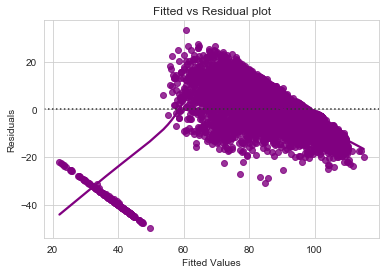

In [48]:
#linearity without transformation
# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

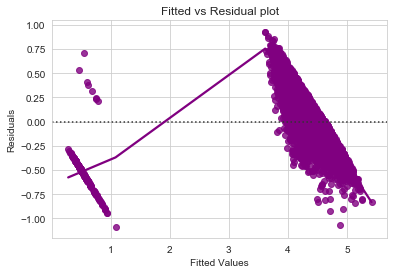

In [49]:
#linearity with transformation
# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred_tfm, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

In [50]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train_tfm.values, i) for i in range(X_train_tfm.shape[1])],
    index=X_train_tfm.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                    92.006069
lread                     5.405953
lwrite                    3.870681
scall                     4.340623
sread                     8.788795
swrite                    7.386769
fork                     16.886482
exec                      4.601272
rchar                     2.680710
wchar                     1.802433
pgout                    46.386694
ppgout                  108.959624
pgfree                   55.153876
pgscan                         NaN
atch                      2.179514
pgin                     35.776926
ppgin                    35.368412
pflt                     14.939260
vflt                     15.147903
freemem                   2.787179
freeswap                  1.507008
runqsz_Not_CPU_Bound      1.176802
dtype: float64



c:\app\Python37\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [51]:
X_train1 = X_train_tfm.drop(["pgscan"], axis=1)
olsmod_1 = sm.OLS(y_train_tfm, X_train1)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.868 
Adjusted R-squared: 0.867


In [61]:
X_train_tfm = X_train_tfm.drop(["pgscan"], axis=1)
olsmod_2 = sm.OLS(y_train_tfm, X_train_tfm)
olsres_2 = olsmod_2.fit()
print(olsres_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1875.
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:19:42   Log-Likelihood:                -1135.4
No. Observations:                5734   AIC:                             2313.
Df Residuals:                    5713   BIC:                             2453.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.4672 

In [62]:
#without pgscan
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train_tfm.values, i) for i in range(X_train_tfm.shape[1])],
    index=X_train_tfm.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                    92.006069
lread                     5.405953
lwrite                    3.870681
scall                     4.340623
sread                     8.788795
swrite                    7.386769
fork                     16.886482
exec                      4.601272
rchar                     2.680710
wchar                     1.802433
pgout                    46.386694
ppgout                  108.959624
pgfree                   55.153876
atch                      2.179514
pgin                     35.776926
ppgin                    35.368412
pflt                     14.939260
vflt                     15.147903
freemem                   2.787179
freeswap                  1.507008
runqsz_Not_CPU_Bound      1.176802
dtype: float64



In [58]:
X_train_2 = X_train_tfm.drop(["ppgout"], axis=1)
olsmod_3= sm.OLS(y_train_tfm, X_train_2)
olsres_3 = olsmod_3.fit()
print(
    "R-squared:",
    np.round(olsres_3.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_3.rsquared_adj, 3),
)

R-squared: 0.868 
Adjusted R-squared: 0.867


In [63]:
X_train_tfm=X_train_tfm.drop(["ppgout"],axis=1)


In [64]:
olsmod_4= sm.OLS(y_train_tfm, X_train_tfm)
olsres_4 = olsmod_4.fit()
print(olsres_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1972.
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:21:23   Log-Likelihood:                -1137.3
No. Observations:                5734   AIC:                             2315.
Df Residuals:                    5714   BIC:                             2448.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.4594 

In [65]:
#w/o ppgout
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train_tfm.values, i) for i in range(X_train_tfm.shape[1])],
    index=X_train_tfm.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                   90.988393
lread                    5.405027
lwrite                   3.870360
scall                    4.339959
sread                    8.787102
swrite                   7.385746
fork                    16.875923
exec                     4.600459
rchar                    2.680618
wchar                    1.797805
pgout                   23.419078
pgfree                  22.691862
atch                     2.179509
pgin                    35.731665
ppgin                   35.295431
pflt                    14.938765
vflt                    15.144445
freemem                  2.767726
freeswap                 1.506496
runqsz_Not_CPU_Bound     1.176360
dtype: float64



In [66]:
X_train_3 = X_train_tfm.drop(["pgin"], axis=1)
olsmod_5= sm.OLS(y_train_tfm, X_train_3)
olsres_5 = olsmod_5.fit()
print(
    "R-squared:",
    np.round(olsres_5.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_5.rsquared_adj, 3),
)

R-squared: 0.866 
Adjusted R-squared: 0.866


without pgin R square value is reducing by 0.002, it might be significant variable, so will not remove from the data

In [67]:
X_train_4 = X_train_tfm.drop(["ppgin"], axis=1)
olsmod_6= sm.OLS(y_train_tfm, X_train_4)
olsres_6 = olsmod_6.fit()
print(
    "R-squared:",
    np.round(olsres_6.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_6.rsquared_adj, 3),
)

R-squared: 0.867 
Adjusted R-squared: 0.867


In [ ]:
X_train_tfm=X_train_tfm.drop(["ppgin"],axis=1)


In [70]:
olsmod_6= sm.OLS(y_train_tfm, X_train_tfm)
olsres_6 = olsmod_6.fit()
print(olsres_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     2068.
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:30:15   Log-Likelihood:                -1154.3
No. Observations:                5734   AIC:                             2347.
Df Residuals:                    5715   BIC:                             2473.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.4507 

In [71]:
#w/o ppgin
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train_tfm.values, i) for i in range(X_train_tfm.shape[1])],
    index=X_train_tfm.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                   90.840272
lread                    5.366940
lwrite                   3.858827
scall                    4.335468
sread                    8.782908
swrite                   7.385184
fork                    16.860477
exec                     4.600243
rchar                    2.622642
wchar                    1.797450
pgout                   23.351963
pgfree                  22.537475
atch                     2.178717
pgin                     2.076315
pflt                    14.932956
vflt                    15.132834
freemem                  2.762877
freeswap                 1.506041
runqsz_Not_CPU_Bound     1.176026
dtype: float64



In [72]:
X_train_5 = X_train_tfm.drop(["pgout"], axis=1)
olsmod_7= sm.OLS(y_train_tfm, X_train_3)
olsres_7 = olsmod_7.fit()
print(
    "R-squared:",
    np.round(olsres_7.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_7.rsquared_adj, 3),
)

R-squared: 0.866 
Adjusted R-squared: 0.866


In [73]:
X_train_6 = X_train_tfm.drop(["pgfree"], axis=1)
olsmod_8= sm.OLS(y_train_tfm, X_train_6)
olsres_8 = olsmod_8.fit()
print(
    "R-squared:",
    np.round(olsres_8.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_8.rsquared_adj, 3),
)

R-squared: 0.867 
Adjusted R-squared: 0.866


No change in the R square value without pgfree, so we need to remove it

In [74]:
X_train_tfm=X_train_tfm.drop(["pgfree"],axis=1)
olsmod_9= sm.OLS(y_train_tfm, X_train_tfm)
olsres_9 = olsmod_9.fit()
print(olsres_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     2190.
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:41:22   Log-Likelihood:                -1155.2
No. Observations:                5734   AIC:                             2346.
Df Residuals:                    5716   BIC:                             2466.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.4498 

In [75]:
#w/o pgfree
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train_tfm.values, i) for i in range(X_train_tfm.shape[1])],
    index=X_train_tfm.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                   90.810076
lread                    5.355764
lwrite                   3.848450
scall                    4.327194
sread                    8.781862
swrite                   7.384470
fork                    16.850634
exec                     4.598412
rchar                    2.618059
wchar                    1.797445
pgout                    2.701316
atch                     2.176017
pgin                     2.069703
pflt                    14.918368
vflt                    15.078705
freemem                  2.750559
freeswap                 1.501754
runqsz_Not_CPU_Bound     1.175587
dtype: float64



In [76]:
X_train_7 = X_train_tfm.drop(["fork"], axis=1)
olsmod_10= sm.OLS(y_train_tfm, X_train_7)
olsres_10= olsmod_10.fit()
print(
    "R-squared:",
    np.round(olsres_10.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_10.rsquared_adj, 3),
)

R-squared: 0.865 
Adjusted R-squared: 0.865


As the fork reducing 0.002 value of R square, so might be important. We will not remove it

In [77]:
X_train_8 = X_train_tfm.drop(["vflt"], axis=1)
olsmod_11= sm.OLS(y_train_tfm, X_train_8)
olsres_11= olsmod_11.fit()
print(
    "R-squared:",
    np.round(olsres_11.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_11.rsquared_adj, 3),
)

R-squared: 0.864 
Adjusted R-squared: 0.863


Removing vflt effecting the R square value by 0.004 reduced. so no need to remove

In [78]:
X_train_9 = X_train_tfm.drop(["pflt"], axis=1)
olsmod_12= sm.OLS(y_train_tfm, X_train_9)
olsres_12= olsmod_12.fit()
print(
    "R-squared:",
    np.round(olsres_12.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_12.rsquared_adj, 3),
)

R-squared: 0.864 
Adjusted R-squared: 0.864


In [80]:
X_train_10 = X_train_tfm.drop(["sread"], axis=1)
olsmod_13= sm.OLS(y_train_tfm, X_train_10)
olsres_13= olsmod_13.fit()
print(
    "R-squared:",
    np.round(olsres_13.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_13.rsquared_adj, 3),
)

R-squared: 0.867 
Adjusted R-squared: 0.866


In [81]:
X_train_tfm=X_train_tfm.drop(["sread"],axis=1)
olsmod_14= sm.OLS(y_train_tfm, X_train_tfm)
olsres_14= olsmod_14.fit()
print(olsres_14.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     2322.
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:01:58   Log-Likelihood:                -1160.0
No. Observations:                5734   AIC:                             2354.
Df Residuals:                    5717   BIC:                             2467.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.4442 

In [82]:
# w/o sread
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train_tfm.values, i) for i in range(X_train_tfm.shape[1])],
    index=X_train_tfm.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                   90.600063
lread                    5.349358
lwrite                   3.841657
scall                    3.883814
swrite                   4.369311
fork                    16.834871
exec                     4.595042
rchar                    2.031909
wchar                    1.779942
pgout                    2.700847
atch                     2.174413
pgin                     2.066971
pflt                    14.915421
vflt                    14.984715
freemem                  2.742577
freeswap                 1.499386
runqsz_Not_CPU_Bound     1.175068
dtype: float64



In [83]:
X_train_11 = X_train_tfm.drop(["lread"], axis=1)
olsmod_15= sm.OLS(y_train_tfm, X_train_11)
olsres_15= olsmod_15.fit()
print(
    "R-squared:",
    np.round(olsres_15.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_15.rsquared_adj, 3),
)

R-squared: 0.867 
Adjusted R-squared: 0.866


In [84]:
X_train_tfm=X_train_tfm.drop(["lread"],axis=1)
olsmod_16= sm.OLS(y_train_tfm, X_train_tfm)
olsres_16= olsmod_16.fit()
print(olsres_16.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     2477.
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:09:16   Log-Likelihood:                -1160.1
No. Observations:                5734   AIC:                             2352.
Df Residuals:                    5718   BIC:                             2459.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.4437 

In [85]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train_tfm.values, i) for i in range(X_train_tfm.shape[1])],
    index=X_train_tfm.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                   90.538840
lwrite                   1.118133
scall                    3.880861
swrite                   4.357036
fork                    16.729398
exec                     4.595042
rchar                    2.031500
wchar                    1.775132
pgout                    2.699914
atch                     2.174030
pgin                     2.034852
pflt                    14.876963
vflt                    14.934495
freemem                  2.735636
freeswap                 1.498185
runqsz_Not_CPU_Bound     1.167543
dtype: float64



In [86]:
X_train_12 = X_train_tfm.drop(["wchar"], axis=1)
olsmod_17= sm.OLS(y_train_tfm, X_train_12)
olsres_17= olsmod_17.fit()
print(
    "R-squared:",
    np.round(olsres_17.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_17.rsquared_adj, 3),
)

R-squared: 0.867 
Adjusted R-squared: 0.866


In [87]:
X_train_tfm=X_train_tfm.drop(["wchar"],axis=1)
olsmod_18= sm.OLS(y_train_tfm, X_train_tfm)
olsres_18= olsmod_18.fit()
print(olsres_18.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     2655.
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:20:46   Log-Likelihood:                -1160.3
No. Observations:                5734   AIC:                             2351.
Df Residuals:                    5719   BIC:                             2450.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.4463 

In [88]:
# let's check the model parameters
olsres_18.params

const                  -0.446306
lwrite                  0.005574
scall                   0.024553
swrite                  0.009951
fork                   -0.346260
exec                    0.072826
rchar                  -0.002360
pgout                  -0.082113
atch                    0.050628
pgin                    0.069345
pflt                   -0.103905
vflt                    0.106687
freemem                -0.034067
freeswap                0.044571
runqsz_Not_CPU_Bound    0.221948
dtype: float64

In [90]:
# Let us write the equation of linear regression
Equation = "usr ="
print(Equation, end=" ")
for i in range(len(X_train_tfm.columns)):
    if i == 0:
        print(olsres_18.params[i], "+", end=" ")
    elif i != len(X_train_tfm.columns) - 1:
        print(
            olsres_18.params[i],
            "* (",
            X_train_tfm.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsres_11.params[i], "* (", X_train_tfm.columns[i], ")")

usr = -0.44630643867097636 + 0.005574039028878019 * ( lwrite ) +  0.024552830539764835 * ( scall ) +  0.00995061092301841 * ( swrite ) +  -0.34625960283487744 * ( fork ) +  0.07282623310597805 * ( exec ) +  -0.0023597025694529336 * ( rchar ) +  -0.08211331397359337 * ( pgout ) +  0.0506282519769673 * ( atch ) +  0.06934455145127787 * ( pgin ) +  -0.10390486913144725 * ( pflt ) +  0.10668668134488296 * ( vflt ) +  -0.03406748500220984 * ( freemem ) +  0.04457112055308339 * ( freeswap ) +  -0.03322907797377543 * ( runqsz_Not_CPU_Bound )


In [140]:
X_train_tfm.columns

Index(['const', 'lwrite', 'scall', 'swrite', 'fork', 'exec', 'rchar', 'pgout',
       'atch', 'pgin', 'pflt', 'vflt', 'freemem', 'freeswap',
       'runqsz_Not_CPU_Bound'],
      dtype='object')

In [141]:
X_test_tfm.columns

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound'],
      dtype='object')

In [150]:
X_test_tfm=sm.add_constant(X_test_tfm)

c:\app\Python37\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [151]:
X_test_f=X_test_tfm.drop(
    ["lread", "sread", "wchar", "ppgout","pgfree","pgscan","ppgin"], axis=1
)

In [152]:
# let's make predictions on the test set
y_pred = olsres_18.predict(X_test_f)

In [161]:
olsmod_18= sm.OLS(y_test_tfm, X_test_f)
olsres_18= olsmod_18.fit()
print(olsres_18.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     1282.
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:59:42   Log-Likelihood:                -560.79
No. Observations:                2458   AIC:                             1152.
Df Residuals:                    2443   BIC:                             1239.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.6277 

In [153]:
# let's check the RMSE on the train data
from sklearn.metrics import mean_absolute_error, mean_squared_error
rmse1 = np.sqrt(mean_squared_error(y_train_tfm, df_pred_tfm["Fitted Values"]))
rmse1

0.2949558701664114

In [154]:
# let's check the RMSE on the test data
rmse2 = np.sqrt(mean_squared_error(y_test_tfm, y_pred))
rmse2

0.3059691810241985

In [155]:
# let's check the MAE on the train data
mae1 = mean_absolute_error(y_train_tfm, df_pred_tfm["Fitted Values"])
mae1

0.23491124699140703

In [156]:
# let's check the MAE on the test data
mae2 = mean_absolute_error(y_test_tfm, y_pred)
mae2

0.24339697304465915

# Problem 2: Logistic Regression, LDA and CART

You are a statistician at the Republic of Indonesia Ministry of Health and you are provided with a data of 1473 females collected from a Contraceptive Prevalence Survey. The samples are married women who were either not pregnant or do not know if they were at the time of the survey.

The problem is to predict do/don't they use a contraceptive method of choice based on their demographic and socio-economic characteristics.

Dataset for Problem 2: Contraceptive_method_dataset.xlsx

Data Dictionary:

1. Wife's age (numerical)
2. Wife's education (categorical) 1=uneducated, 2, 3, 4=tertiary
3. Husband's education (categorical) 1=uneducated, 2, 3, 4=tertiary
4. Number of children ever born (numerical)
5. Wife's religion (binary) Non-Scientology, Scientology
6. Wife's now working? (binary) Yes, No
7. Husband's occupation (categorical) 1, 2, 3, 4(random)
8. Standard-of-living index (categorical) 1=verlow, 2, 3, 4=high
9. Media exposure (binary) Good, Not good
10. Contraceptive method used (class attribute) No,Yes

In [91]:
d1=pd.read_excel(r'C:/Users/z0126520/Documents/Python/GL/Week 20_Project/Contraceptive_method_dataset.xlsx')

## 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, check for duplicates and outliers and write an inference on it. Perform Univariate and Bivariate Analysis and Multivariate Analysis.

In [92]:
d1.head()

Wife_age Wife_ education Husband_education  No_of_children_born  \
0      24.0         Primary         Secondary                  3.0   
1      45.0      Uneducated         Secondary                 10.0   
2      43.0         Primary         Secondary                  7.0   
3      42.0       Secondary           Primary                  9.0   
4      36.0       Secondary         Secondary                  8.0   

  Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0   Scientology           No                   2                     High   
1   Scientology           No                   3                Very High   
2   Scientology           No                   3                Very High   
3   Scientology           No                   3                     High   
4   Scientology           No                   3                      Low   

  Media_exposure  Contraceptive_method_used  
0         Exposed                        No  
1         Exposed                        No  
2         Exposed                        No  
3         Exposed                        No  
4         Exposed                        No

In [93]:
d1.tail()

Wife_age Wife_ education Husband_education  No_of_children_born  \
1468      33.0        Tertiary          Tertiary                  NaN   
1469      33.0        Tertiary          Tertiary                  NaN   
1470      39.0       Secondary         Secondary                  NaN   
1471      33.0       Secondary         Secondary                  NaN   
1472      17.0       Secondary         Secondary                  1.0   

     Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
1468   Scientology          Yes                   2                Very High   
1469   Scientology           No                   1                Very High   
1470   Scientology          Yes                   1                Very High   
1471   Scientology          Yes                   2                      Low   
1472   Scientology           No                   2                Very High   

     Media_exposure  Contraceptive_method_used  
1468         Exposed                       Yes  
1469         Exposed                       Yes  
1470         Exposed                       Yes  
1471         Exposed                       Yes  
1472         Exposed                       Yes

In [94]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
Wife_age                     1402 non-null float64
Wife_ education              1473 non-null object
Husband_education            1473 non-null object
No_of_children_born          1452 non-null float64
Wife_religion                1473 non-null object
Wife_Working                 1473 non-null object
Husband_Occupation           1473 non-null int64
Standard_of_living_index     1473 non-null object
Media_exposure               1473 non-null object
Contraceptive_method_used    1473 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [95]:
d1.describe(include='all')

Wife_age Wife_ education Husband_education  No_of_children_born  \
count   1402.000000            1473              1473          1452.000000   
unique          NaN               4                 4                  NaN   
top             NaN        Tertiary          Tertiary                  NaN   
freq            NaN             577               899                  NaN   
mean      32.606277             NaN               NaN             3.254132   
std        8.274927             NaN               NaN             2.365212   
min       16.000000             NaN               NaN             0.000000   
25%       26.000000             NaN               NaN             1.000000   
50%       32.000000             NaN               NaN             3.000000   
75%       39.000000             NaN               NaN             4.000000   
max       49.000000             NaN               NaN            16.000000   

       Wife_religion Wife_Working  Husband_Occupation  \
count           1473         1473         1473.000000   
unique             2            2                 NaN   
top      Scientology           No                 NaN   
freq            1253         1104                 NaN   
mean             NaN          NaN            2.137814   
std              NaN          NaN            0.864857   
min              NaN          NaN            1.000000   
25%              NaN          NaN            1.000000   
50%              NaN          NaN            2.000000   
75%              NaN          NaN            3.000000   
max              NaN          NaN            4.000000   

       Standard_of_living_index Media_exposure  Contraceptive_method_used  
count                      1473            1473                      1473  
unique                        4               2                         2  
top                   Very High         Exposed                       Yes  
freq                        684            1364                       844  
mean                        NaN             NaN                       NaN  
std                         NaN             NaN                       NaN  
min                         NaN             NaN                       NaN  
25%                         NaN             NaN                       NaN  
50%                         NaN             NaN                       NaN  
75%                         NaN             NaN                       NaN  
max                         NaN             NaN                       NaN

In [96]:
d1.groupby(["Contraceptive_method_used"]).count()

Wife_age  Wife_ education  Husband_education  \
Contraceptive_method_used                                                 
No                              629              629                629   
Yes                             773              844                844   

                           No_of_children_born  Wife_religion  Wife_Working  \
Contraceptive_method_used                                                     
No                                         629            629           629   
Yes                                        823            844           844   

                           Husband_Occupation  Standard_of_living_index  \
Contraceptive_method_used                                                 
No                                        629                       629   
Yes                                       844                       844   

                           Media_exposure   
Contraceptive_method_used                   
No                                     629  
Yes                                    844

In [97]:
d1.isnull().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [98]:
d1.duplicated().sum()

80

In [100]:
d1.drop_duplicates(keep=False,inplace=True)

In [101]:
d1.duplicated().sum()

0

In [102]:
for column in d1.columns:
    if d1[column].dtype != 'object':
        mean = d1[column].mean()
        d1[column] = d1[column].fillna(mean)    
        
d1.isnull().sum()

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

In [103]:
for feature in d1.columns: 
    if d1[feature].dtype == 'object':
        d1[feature] = pd.Categorical(d1[feature]).codes #Encoding 

In [104]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1322 entries, 0 to 1472
Data columns (total 10 columns):
Wife_age                     1322 non-null float64
Wife_ education              1322 non-null int8
Husband_education            1322 non-null int8
No_of_children_born          1322 non-null float64
Wife_religion                1322 non-null int8
Wife_Working                 1322 non-null int8
Husband_Occupation           1322 non-null int64
Standard_of_living_index     1322 non-null int8
Media_exposure               1322 non-null int8
Contraceptive_method_used    1322 non-null int8
dtypes: float64(2), int64(1), int8(7)
memory usage: 50.3 KB


In [105]:
d1.groupby(["Contraceptive_method_used"]).count()

Wife_age  Wife_ education  Husband_education  \
Contraceptive_method_used                                                 
0                               600              600                600   
1                               722              722                722   

                           No_of_children_born  Wife_religion  Wife_Working  \
Contraceptive_method_used                                                     
0                                          600            600           600   
1                                          722            722           722   

                           Husband_Occupation  Standard_of_living_index  \
Contraceptive_method_used                                                 
0                                         600                       600   
1                                         722                       722   

                           Media_exposure   
Contraceptive_method_used                   
0                                      600  
1                                      722

Univariate Analysis

In [106]:
def univariateAnalysis_numeric(column,nbins):
    plt.figure(figsize=(10,10))
    plt.subplot(2,2,1)
    sns.distplot(d1[column], kde=True, color='g');
    plt.subplot(2,2,2)
    ax = sns.boxplot(x=d1[column])
    plt.show()

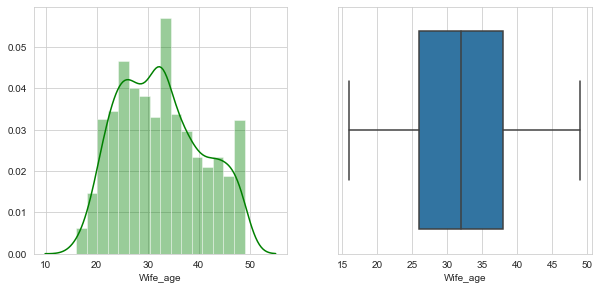

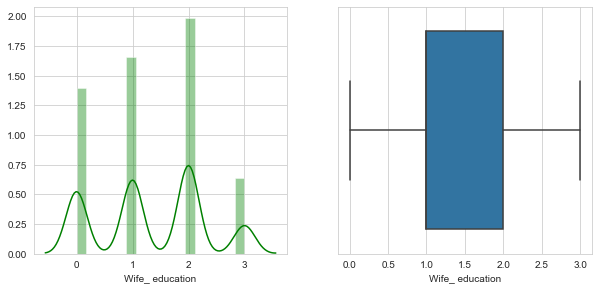

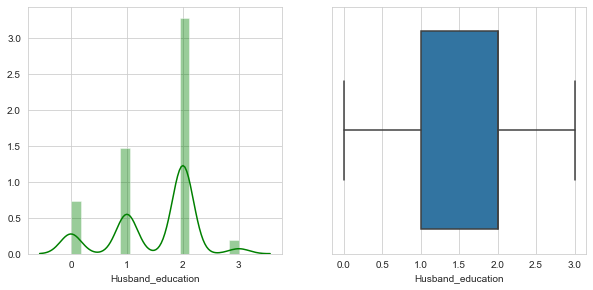

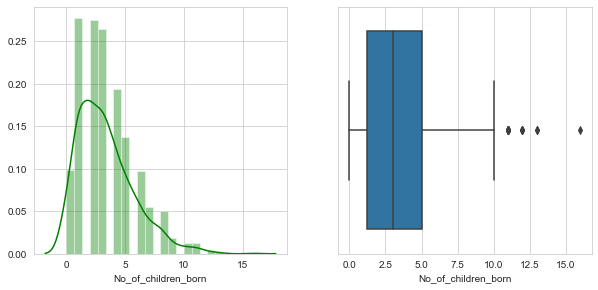

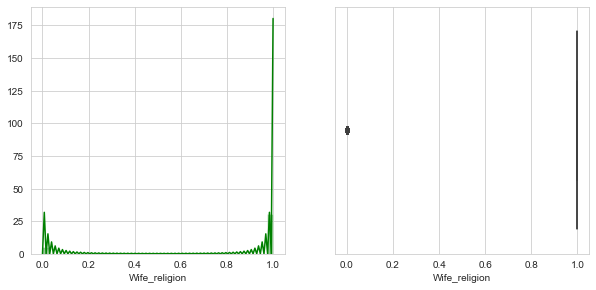

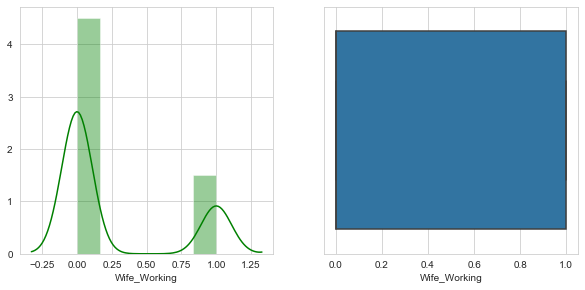

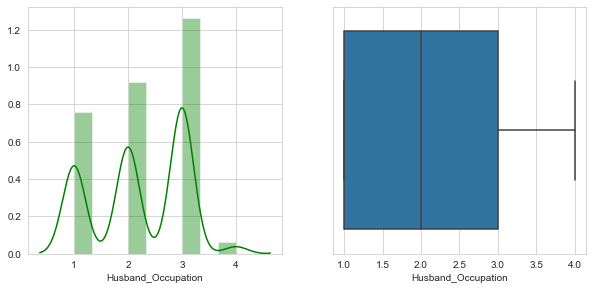

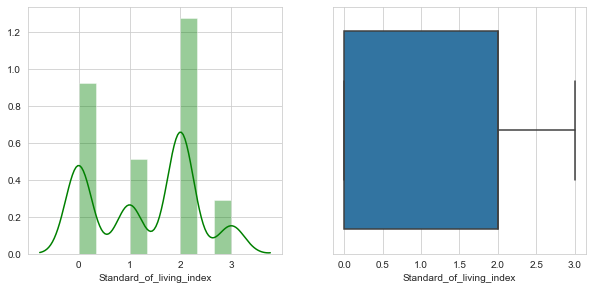

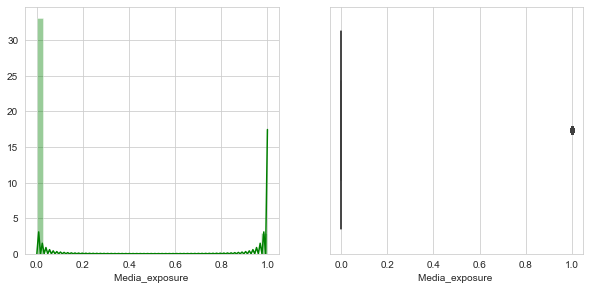

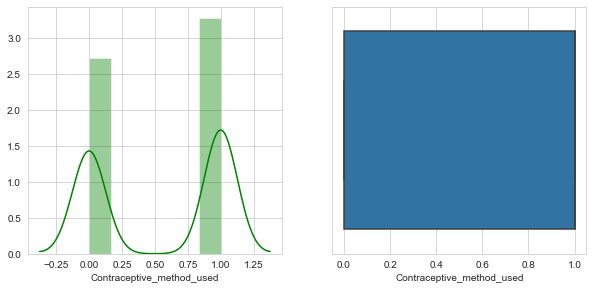

In [107]:
for i in d1.columns:
        univariateAnalysis_numeric(i,3)

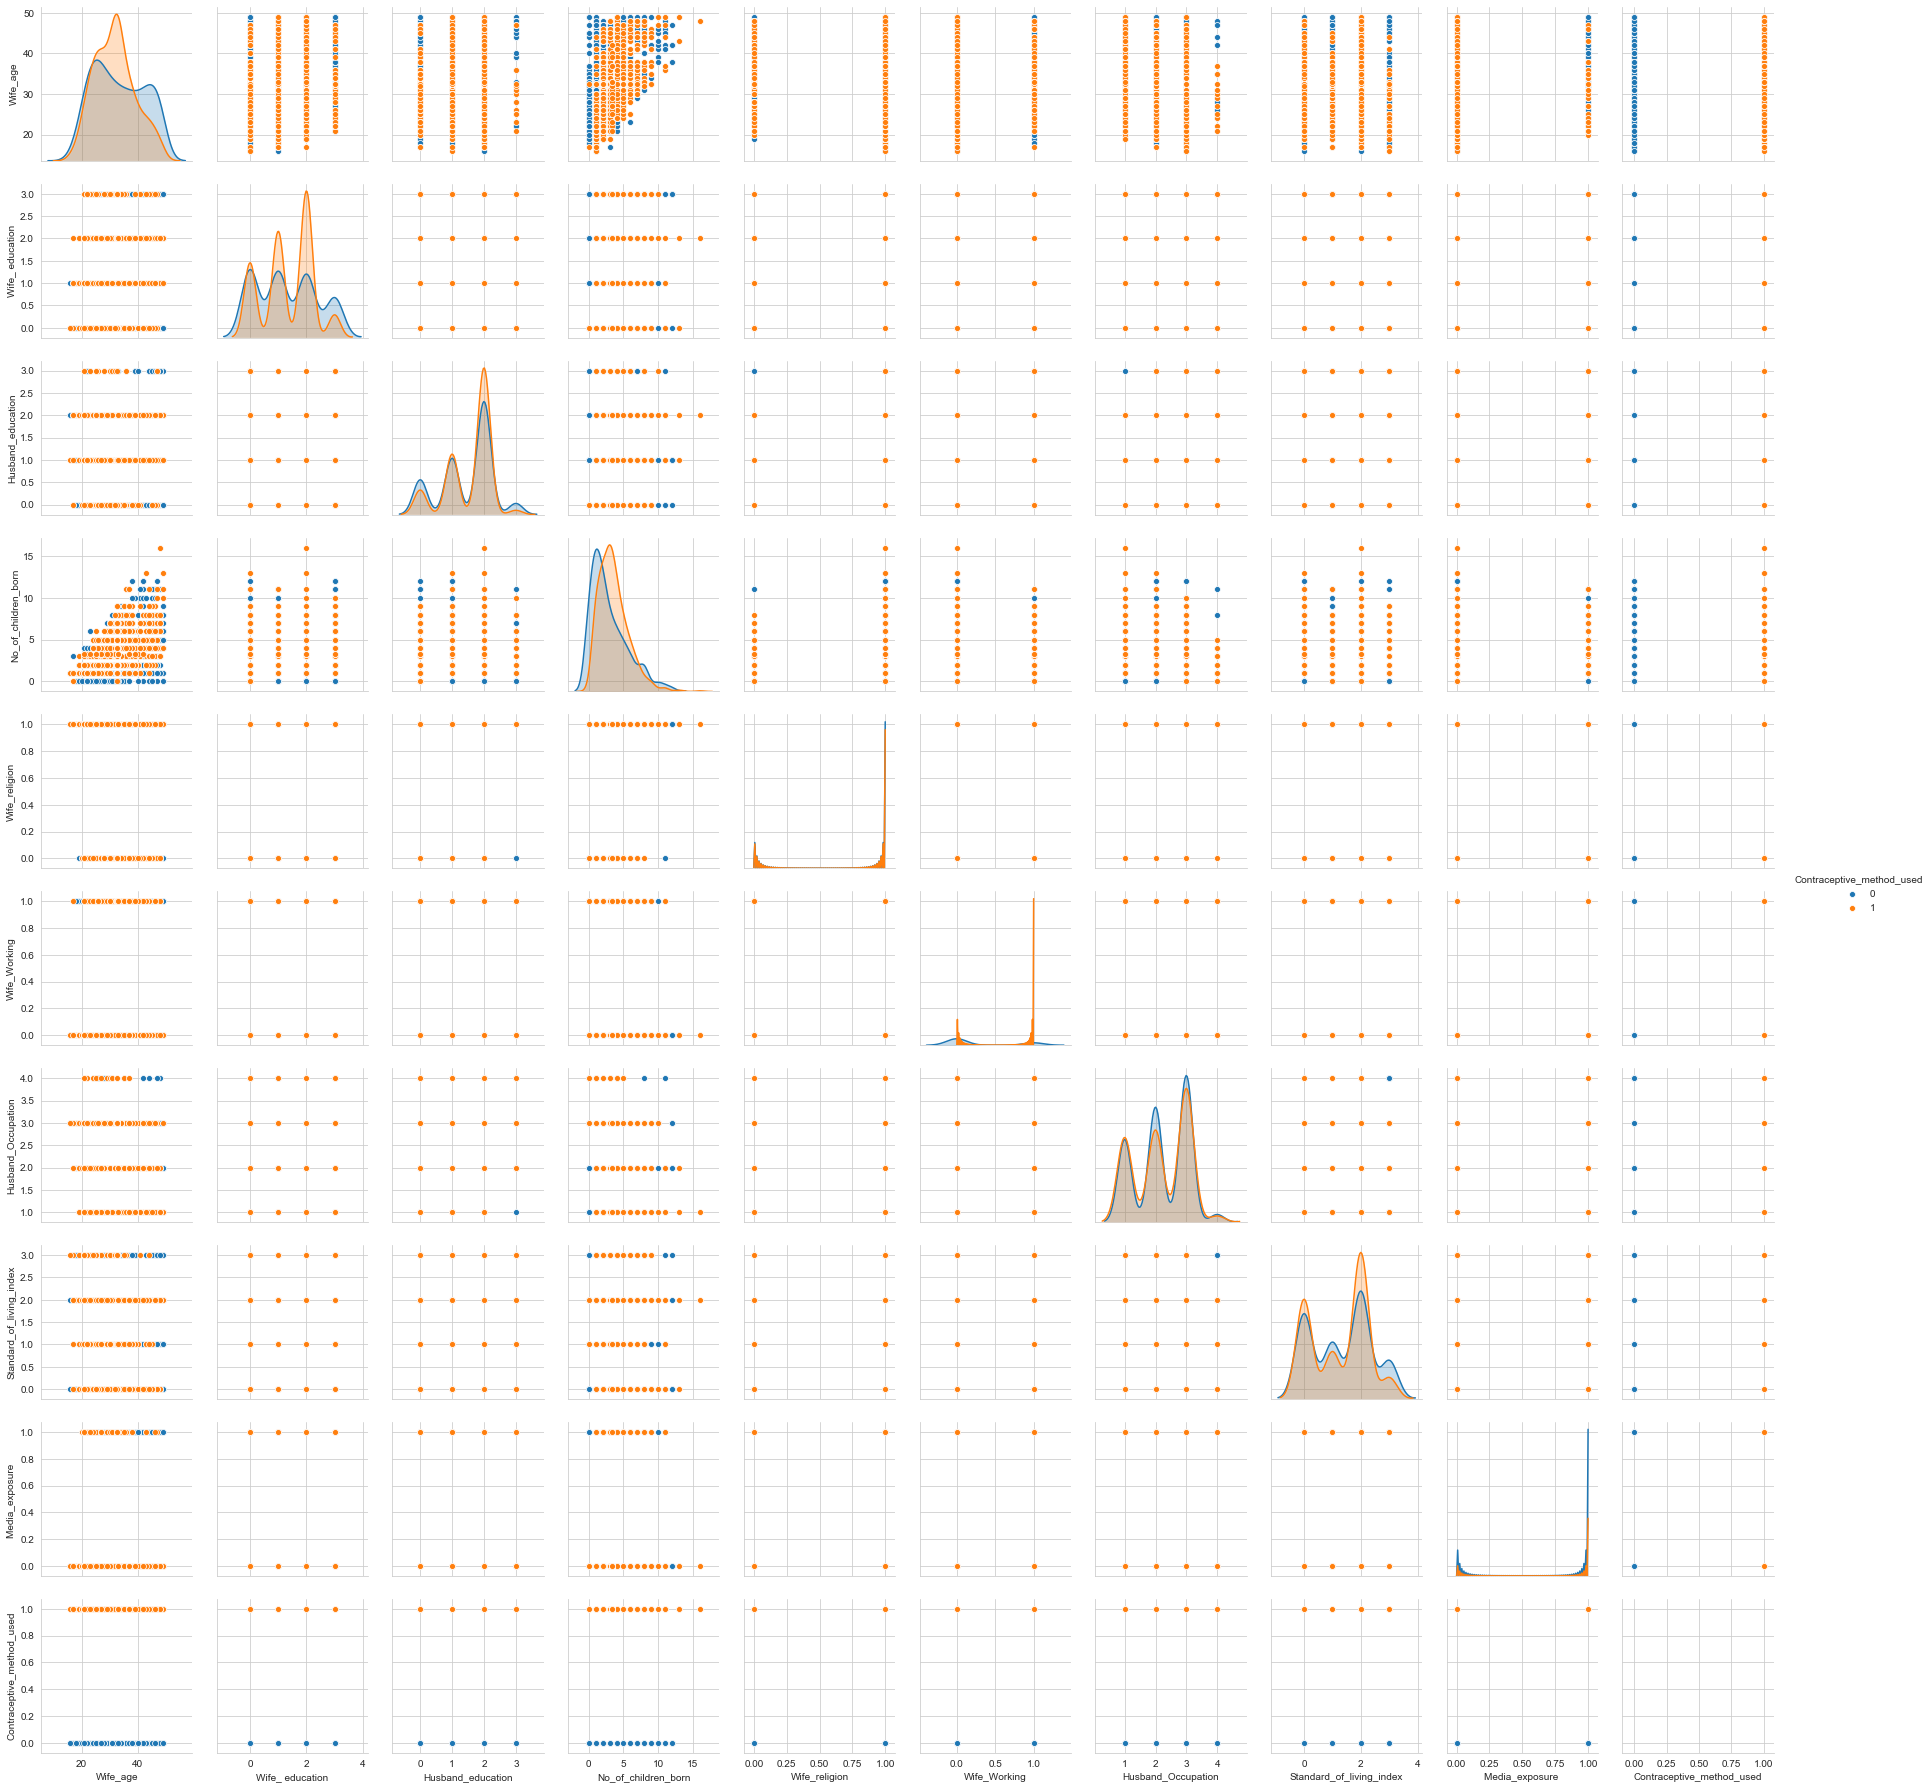

In [109]:
sns.pairplot(d1 , hue='Contraceptive_method_used' , diag_kind = 'kde');

### Multivariate analysis

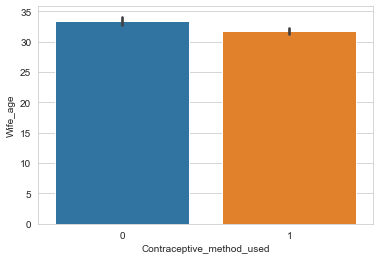

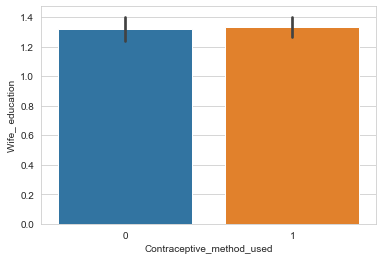

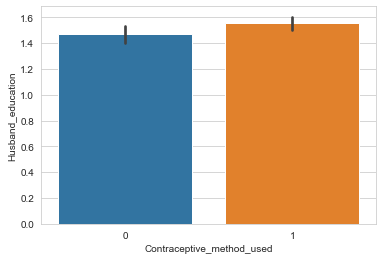

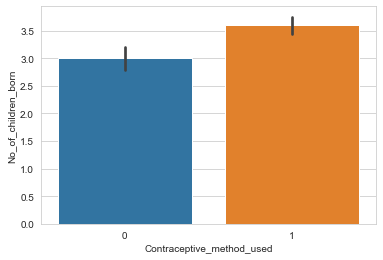

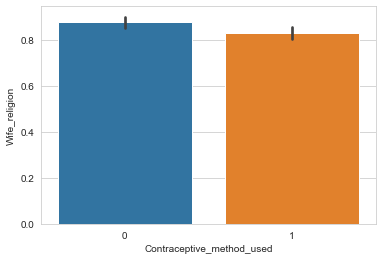

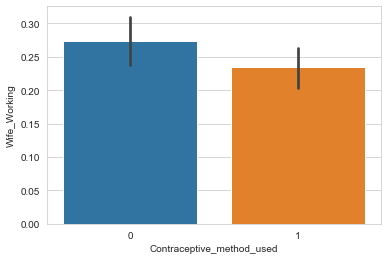

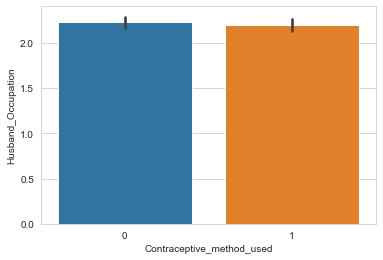

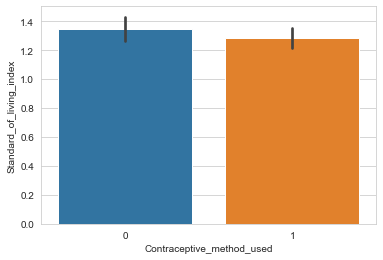

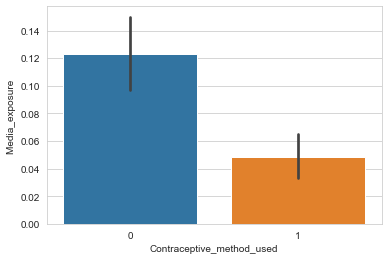

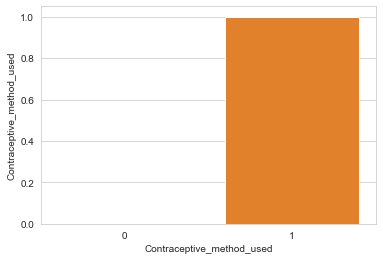

In [113]:
for x in d1.columns:
    sns.barplot(d1.Contraceptive_method_used, d1[x])
    plt.show()

LOGISTIC REGRESSION

## 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis) and CART.

In [114]:
X = d1.drop('Contraceptive_method_used', axis=1)
y = d1[['Contraceptive_method_used']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [115]:
from sklearn.linear_model import LogisticRegression
model_logit = LogisticRegression()
model_logit.fit(X_train, y_train)
y_predict = model_logit.predict(X_test)
model_score = model_logit.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict));

0.6196473551637279
[[ 79 108]
 [ 43 167]]
              precision    recall  f1-score   support

           0       0.65      0.42      0.51       187
           1       0.61      0.80      0.69       210

    accuracy                           0.62       397
   macro avg       0.63      0.61      0.60       397
weighted avg       0.63      0.62      0.61       397



c:\app\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\app\Python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


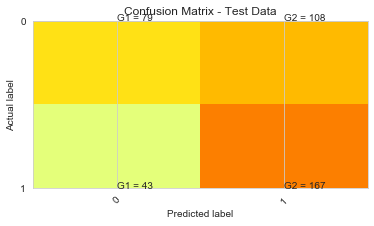

In [116]:
cm = metrics.confusion_matrix(y_test, y_predict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = [0,1]
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

LDA

In [117]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [118]:
clf_lda = LinearDiscriminantAnalysis()
model_lda=clf_lda.fit(X_train,y_train)

c:\app\Python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [119]:
clf_lda.intercept_ 

array([2.54066362])

In [120]:
clf_lda.coef_

array([[-0.08388022,  0.19178057,  0.14191465,  0.28348428, -0.7540312 ,
        -0.00119277, -0.07464787, -0.06710266, -1.13568256]])

In [121]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model_lda.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model_lda.predict(X_test)

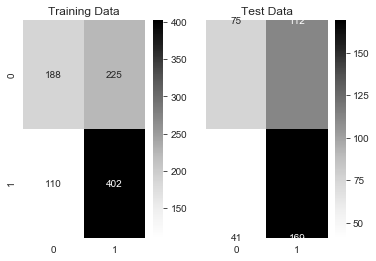

In [122]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [123]:
print('Classification Report of the training data_LDA:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data_LDa:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')


Classification Report of the training data_LDA:

               precision    recall  f1-score   support

           0       0.63      0.46      0.53       413
           1       0.64      0.79      0.71       512

    accuracy                           0.64       925
   macro avg       0.64      0.62      0.62       925
weighted avg       0.64      0.64      0.63       925
 

Classification Report of the test data_LDa:

               precision    recall  f1-score   support

           0       0.65      0.40      0.50       187
           1       0.60      0.80      0.69       210

    accuracy                           0.61       397
   macro avg       0.62      0.60      0.59       397
weighted avg       0.62      0.61      0.60       397
 



CART

In [124]:
from sklearn.tree import DecisionTreeClassifier

In [125]:
dt_model_CART= DecisionTreeClassifier(criterion = 'gini' )

In [126]:
dt_model_CART.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [128]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Credit_Tree_File = open('C:/Users/z0126520/Documents/Python/GL/Week 20_Project/credit_tree.dot','w')
dot_data = tree.export_graphviz(dt_model_CART, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_File.close()

In [129]:
print (pd.DataFrame(dt_model_CART.feature_importances_, columns = ["Imp"], index = X_train.columns))

                               Imp
Wife_age                  0.290409
Wife_ education           0.099237
Husband_education         0.074127
No_of_children_born       0.267027
Wife_religion             0.024210
Wife_Working              0.036997
Husband_Occupation        0.086601
Standard_of_living_index  0.108561
Media_exposure            0.012831


In [130]:
y_predict = dt_model_CART.predict(X_test)

In [131]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 20,min_samples_leaf=26,min_samples_split=133)
reg_dt_model.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=26, min_samples_split=133,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [132]:
credit_tree_regularized = open('C:/Users/z0126520/Documents/Python/GL/Week 20_Project/credit_tree_regularized_20new.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= credit_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

credit_tree_regularized.close()

print (pd.DataFrame(dt_model_CART.feature_importances_, columns = ["Imp"], index = X_train.columns))


                               Imp
Wife_age                  0.290409
Wife_ education           0.099237
Husband_education         0.074127
No_of_children_born       0.267027
Wife_religion             0.024210
Wife_Working              0.036997
Husband_Occupation        0.086601
Standard_of_living_index  0.108561
Media_exposure            0.012831


## 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

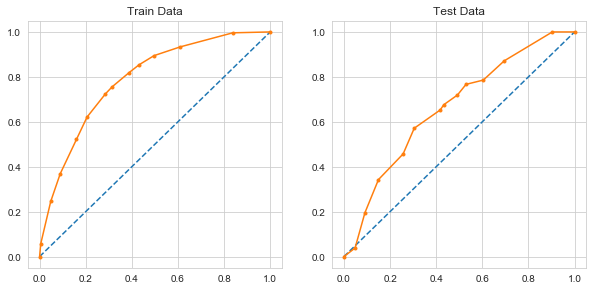

In [133]:
#ROC_CART-train

probs_cart = reg_dt_model.predict_proba(X_train)
probs_cart = probs_cart[:, 1]
plt.figure(figsize=(10,10))
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs_cart)
plt.subplot(221)
plt.title('Train Data')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')


#ROC_CART-test
probs_cart_test = reg_dt_model.predict_proba(X_test)
probs_cart_test = probs_cart_test[:, 1]
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs_cart_test)
plt.subplot(222)
plt.title('Test Data')

plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()



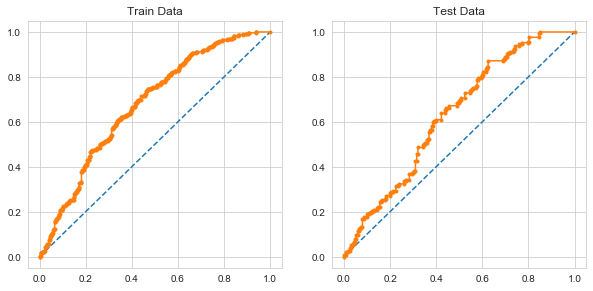

In [135]:
#ROC_LDA
#  calculate roc curve
pred_prob_train = model_lda.predict_proba(X_train)
pred_prob_train[:,1]
plt.figure(figsize=(10,10))
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.subplot(221)
plt.title('Train Data')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


pred_prob_test = model_lda.predict_proba(X_test)
pred_prob_test[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.subplot(222)
plt.title('Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

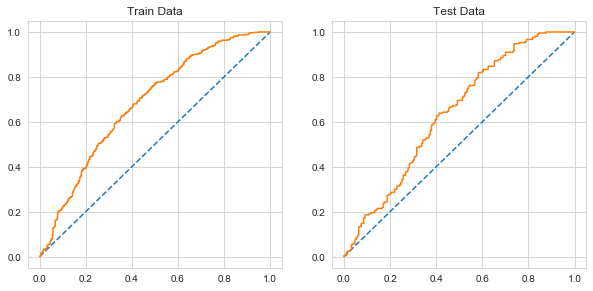

In [136]:
#ROC_Logistic
probs_train = model_logit.predict_proba(X_train)
probs_train = probs_train[:, 1]
plt.figure(figsize=(10,10))
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_train)
plt.subplot(221)
plt.title('Train Data')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

probs_test = model_logit.predict_proba(X_test)
probs_test = probs_test[:, 1]
plt.subplot(222)
plt.title('Test Data')
train_fpr, train_tpr, train_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [137]:
#AUC CART

probs_train = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_train = probs_train[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs_train)
print('AUC CART TRAIN DATA: %.3f' % auc)

probs_test = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_test = probs_test[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs_test)
print('AUC CART TEST DATA: %.3f' % auc)

AUC CART TRAIN DATA: 0.788
AUC CART TEST DATA: 0.662


In [138]:
#AUC LDA
pred_prob_train = model_lda.predict_proba(X_train)
pred_prob_train[:,1]
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC CART TRAIN DATA: %.3f' % auc)

pred_prob_test = model_lda.predict_proba(X_test)
pred_prob_test[:,1]
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC CART TEST DATA: %.3f' % auc)



AUC CART TRAIN DATA: 0.678
AUC CART TEST DATA: 0.632


In [139]:
#AUC LOGISTIC
probs_logit_train = model_logit.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_logit_train = probs_logit_train[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs_logit_train)
print('AUC LOGISTIC TRAIN DATA: %.3f' % auc)

probs_logit_test = model_logit.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_logit_test = probs_logit_test[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs_logit_test)
print('AUC LOGISTIC TEST DATA: %.3f' % auc)

AUC LOGISTIC TRAIN DATA: 0.680
AUC LOGISTIC TEST DATA: 0.636
